# Machine-Learning Based Cyber Security
# Solution 3

### SENG 4610 – Applications of Machine Learning to Software Engineering
#### Sanyam Gupta (T00650151)
#### Ryan Martin (T00549875)
#### Landon McKay (T00576244)

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from tensorflow import keras  # For keras functions
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  # For preprocessing data
from sklearn.compose import ColumnTransformer  # For transforming data with multiple types of preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from tensorflow.keras.utils import to_categorical  # For converting labels to categorical (one-hot encoded)
from scipy.sparse import issparse  # For checking sparse matrices
from tensorflow.keras.models import Sequential  # For creating Sequential neural network models
from tensorflow.keras.layers import Dense, Conv1D, Conv2D, Flatten, MaxPooling1D, Dropout  # For adding layers to the model
from sklearn.metrics import classification_report, confusion_matrix  # For evaluating the model performance
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots and visualizations

data = pd.read_csv('SENG 4610 Training Data.csv')

In [ ]:
# Identifying categorical and numeric columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
target_col = 'attack_cat'

# Remove 'attack_cat' from categorical columns as it is the target
categorical_cols.remove(target_col)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
   transformers=[
       ('num', StandardScaler(), numeric_cols),
       ('cat', OneHotEncoder(), categorical_cols)
   ])


# Separating features and target
X = data.drop(columns=[target_col])
y = data[target_col]

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Convert X_processed from a sparse matrix to a dense matrix
X_processed_dense = X_processed.toarray()

# Reshape data for CNN
num_features = X_processed_dense.shape[1]
X_reshaped = X_processed_dense.reshape(X_processed.shape[0], num_features, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded,test_size=0.15, random_state=42)

# Convert target variable to categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [ ]:

# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding="same", input_shape=(num_features, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding="same"),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model using Adam optimizer with a learning rate of 1e-3
opt = keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
model.fit(X_train, y_train_categorical, epochs=9, batch_size=32, validation_data=(X_test, y_test_categorical))

Epoch 1/9
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 344s 73ms/step - accuracy: 0.8227 - loss: 0.4980 - val_accuracy: 0.8574 - val_loss: 0.4030
Epoch 2/9
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 343s 65ms/step - accuracy: 0.8533 - loss: 0.3854 - val_accuracy: 0.8641 - val_loss: 0.3623
Epoch 3/9
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 331s 67ms/step - accuracy: 0.8617 - loss: 0.3639 - val_accuracy: 0.8654 - val_loss: 0.3560
Epoch 4/9
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 330s 68ms/step - accuracy: 0.8625 - loss: 0.3556 - val_accuracy: 0.8627 - val_loss: 0.3596
Epoch 5/9
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 308s 65ms/step - accuracy: 0.8658 - loss: 0.3487 - val_accuracy: 0.8648 - val_loss: 0.3500
Epoch 6/9
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 323s 66ms/step - accuracy: 0.8658 - loss: 0.3443 - val_accuracy: 0.8680 - val_loss: 0.3457
Epoch 7/9
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 330s 67ms/step - accuracy: 0.8660 - loss: 0.3424 - val_accuracy: 0.8654 - val_loss: 0.3594
Epoch 8/9
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 320s 67ms/step - accuracy: 0.8685 -

822/822 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step
Classification Report:


,precision,recall,f1-score,support
Analysis,0.666667,0.249110,0.362694,281.000000
Backdoor,0.656716,0.161172,0.258824,273.000000
DoS,0.425743,0.048342,0.086825,1779.000000
Exploits,0.623352,0.960166,0.755939,5071.000000
Fuzzers,0.928262,0.868043,0.897143,2713.000000
Generic,0.996956,0.979890,0.988350,6017.000000
Normal,1.000000,1.000000,1.000000,8391.000000
Reconnaissance,0.939527,0.678481,0.787946,1580.000000
Shellcode,0.696970,0.522727,0.597403,176.000000
Worms,1.000000,0.095238,0.173913,21.000000


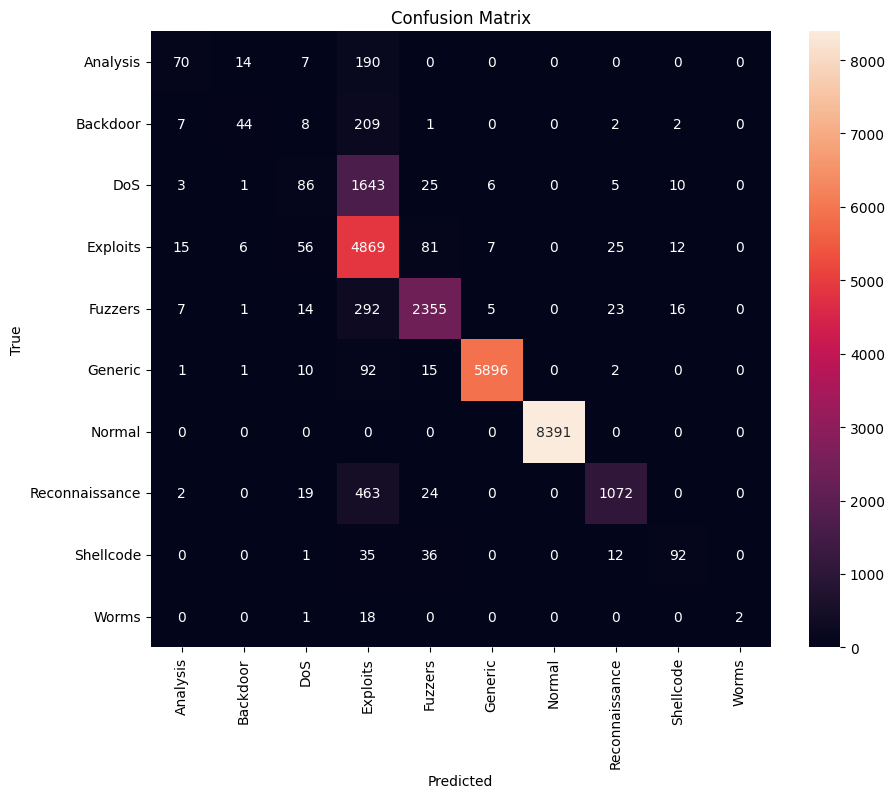

In [ ]:
# Predict classes using the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert test labels back to categorical labels
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Classification report
print("Classification Report:")
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_, zero_division='warn', output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()